In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [4]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(8000, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x 

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
#         self.conv2 = nn.Conv2d(12, 24, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(384, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(-1, 384)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x)
    
net = Network()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.5)

In [6]:
params = list(net.parameters())

In [7]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))])

mnist_train = datasets.MNIST(root = './data', train = True, download = True, transform = None)
mnist_test = datasets.MNIST(root = './data', train = True,
                                             download = True, 
                                             transform = transform)
trainloader = torch.utils.data.DataLoader(mnist_test, batch_size = 64, shuffle = True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

In [18]:
import torchvision

for epoch in range(3):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data 
        optimizer.zero_grad()
        
        outputs = net(inputs)
#         loss = F.nll_loss(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print(f'{epoch+1}, {i + 1:5d}: loss: {loss.item()}')
            running_loss = 0.0
        
print('finished_training')

1,     1: loss: 0.046394214034080505
1,   101: loss: 0.03127996250987053
1,   201: loss: 0.034261155873537064
1,   301: loss: 0.0929308608174324
1,   401: loss: 0.0773945152759552
1,   501: loss: 0.012624056078493595
1,   601: loss: 0.12588277459144592
1,   701: loss: 0.05606408789753914
1,   801: loss: 0.08287828415632248
1,   901: loss: 0.12180402129888535
2,     1: loss: 0.0076458631083369255
2,   101: loss: 0.026226859539747238
2,   201: loss: 0.1723422110080719
2,   301: loss: 0.09180032461881638
2,   401: loss: 0.14097896218299866
2,   501: loss: 0.016741538420319557
2,   601: loss: 0.02591528184711933
2,   701: loss: 0.1332562416791916
2,   801: loss: 0.02810937725007534
2,   901: loss: 0.012514505535364151
3,     1: loss: 0.013679788447916508
3,   101: loss: 0.05908622220158577
3,   201: loss: 0.039572663605213165
3,   301: loss: 0.03458812087774277
3,   401: loss: 0.03345165401697159
3,   501: loss: 0.027014706283807755
3,   601: loss: 0.006019734311848879
3,   701: loss: 0.02

In [82]:
torch.save(net.state_dict(), 'model.pth')
torch.save(optimizer.state_dict(), 'optimizer.pth')

In [12]:
## Isolate the weights for the convolutional layers

params = list(net.parameters())

torch.Size([10, 1, 5, 5])


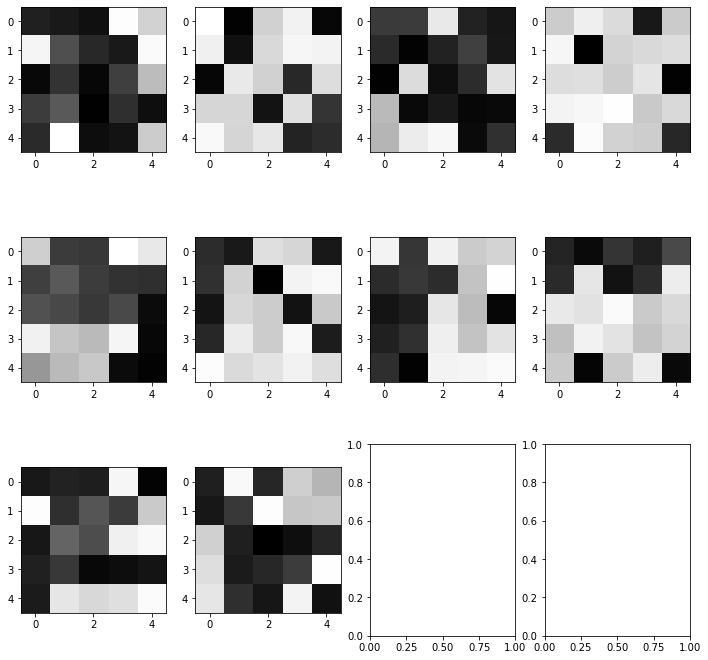

In [13]:
## Plot the weights tensors for the convolutional layers as an image

from PIL import Image
import matplotlib.pyplot as plt

trans = torchvision.transforms.ToPILImage()

conv1_w = params[0]
_, axs = plt.subplots(3, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(conv1_w, axs):
    ax.imshow(trans(img), cmap='gray', vmin=0, vmax=255)
print(params[0].shape)
plt.show()

In [14]:
## Get a random sample image and label from the dataloder

for img, label in trainloader:
    sample_img = img[0]
    sample_label = label[0]

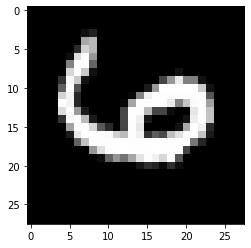

In [15]:
plt.imshow(sample_img[0], cmap = 'gray')

In [16]:
## Set and remove the activation hooks for specified layers

dic = 0
dic = {}

def getactivation(name):
    def hook_func(m , inp ,op):
       dic[name] = op.detach()
    return hook_func

c1 = net.conv1.register_forward_hook(getactivation('c1'))
c2 = net.conv2.register_forward_hook(getactivation('c2'))

output = net(torch.reshape(sample_img, (1, 1, 28, 28)))

c1.remove()
c2.remove()

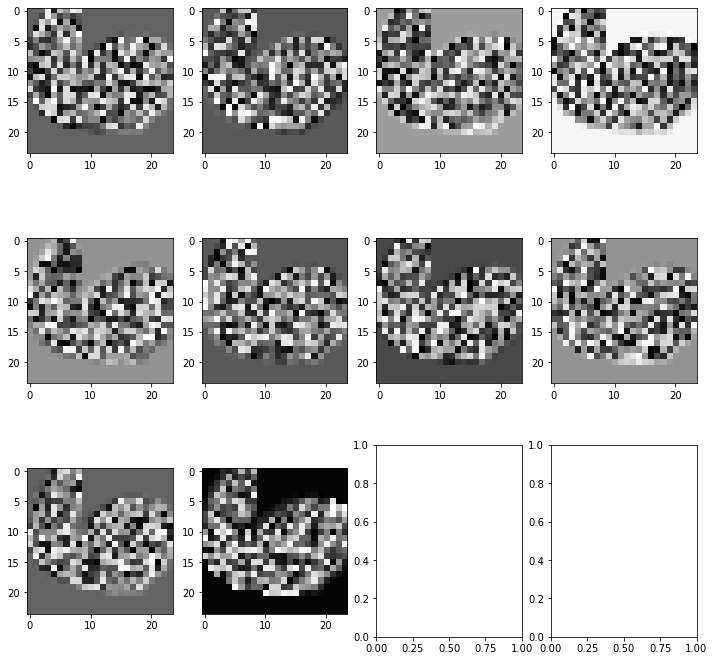

torch.Size([1, 10, 24, 24])

In [17]:
## Plot the activations for the first conv layer `conv1`

_, axs = plt.subplots(3, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic['c1'][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()
dic['c1'].shape

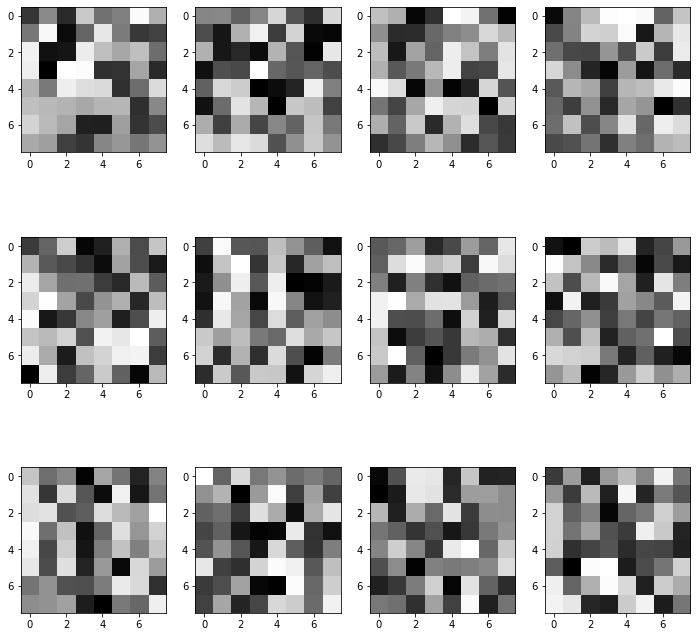

In [89]:
_, axs = plt.subplots(3, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic['c2'][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()

In [17]:
params = list(model.named_parameters())
for name, _ in params:
    print(name)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img_tensor = preprocess(img)

features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.10.weight
features.10.bias
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier.6.weight
classifier.6.bias
